### Student Information
Name: Lee Huai

Student ID: 111065524

GitHub ID: chihuahualee828

Kaggle name: 一条吉

Kaggle private scoreboard snapshot:
[Snapshot](img/pic0.png)
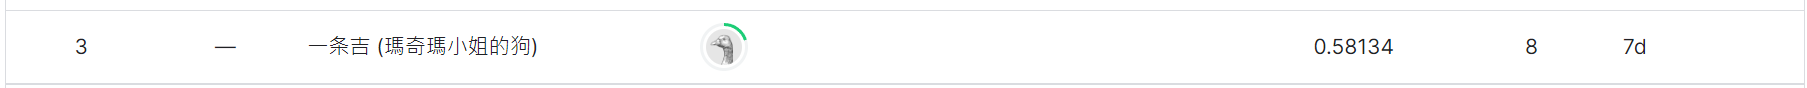

---

### Instructions

1. First: __This part is worth 30% of your grade.__ Do the **take home** exercises in the DM2023-Lab2-master. You may need to copy some cells from the Lab notebook to this notebook. 


2. Second: __This part is worth 30% of your grade.__ Participate in the in-class [Kaggle Competition](https://www.kaggle.com/t/09b1d0f3f8584d06848252277cb535f2) regarding Emotion Recognition on Twitter by this link https://www.kaggle.com/t/09b1d0f3f8584d06848252277cb535f2. The scoring will be given according to your place in the Private Leaderboard ranking: 
    - **Bottom 40%**: Get 20% of the 30% available for this section.

    - **Top 41% - 100%**: Get (60-x)/6 + 20 points, where x is your ranking in the leaderboard (ie. If you rank 3rd your score will be (60-3)/6 + 20 = 29.5% out of 30%)   
    Submit your last submission __BEFORE the deadline (Dec. 27th 11:59 pm, Wednesday)_. Make sure to take a screenshot of your position at the end of the competition and store it as '''pic0.png''' under the **img** folder of this repository and rerun the cell **Student Information**.
    

3. Third: __This part is worth 30% of your grade.__ A report of your work developping the model for the competition (You can use code and comment it). This report should include what your preprocessing steps, the feature engineering steps and an explanation of your model. You can also mention different things you tried and insights you gained. 


4. Fourth: __This part is worth 10% of your grade.__ It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**.


Upload your files to your repository then submit the link to it on the corresponding e-learn assignment.

Make sure to commit and save your changes to your repository __BEFORE the deadline (Dec. 31th 11:59 pm, Sunday)__. 

In [1]:
### Begin Assignment Here

=============================================================================================================
# 1. Take home exercise

---
### ** >>> Exercise 1 (Take home): **  
Plot word frequency for Top 30 words in both train and test dataset. (Hint: refer to DM lab 1)

In [5]:
import pandas as pd

### training data
anger_train = pd.read_csv("../data/semeval/train/anger-ratings-0to1.train.txt",
                         sep="\t", header=None,names=["id", "text", "emotion", "intensity"])
sadness_train = pd.read_csv("../data/semeval/train/sadness-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_train = pd.read_csv("../data/semeval/train/fear-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_train = pd.read_csv("../data/semeval/train/joy-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

# combine 4 sub-dataset
train_df = pd.concat([anger_train, fear_train, joy_train, sadness_train], ignore_index=True)
train_df.head()

,id,text,emotion,intensity
0,10000,How the fu*k! Who the heck! moved my fridge!.....,anger,0.938
1,10001,So my Indian Uber driver just called someone t...,anger,0.896
2,10002,@DPD_UK I asked for my parcel to be delivered ...,anger,0.896
3,10003,so ef whichever butt wipe pulled the fire alar...,anger,0.896
4,10004,Don't join @BTCare they put the phone down on ...,anger,0.896


In [6]:
### testing data
anger_test = pd.read_csv("../data/semeval/dev/anger-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
sadness_test = pd.read_csv("../data/semeval/dev/sadness-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_test = pd.read_csv("../data/semeval/dev/fear-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_test = pd.read_csv("../data/semeval/dev/joy-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

# combine 4 sub-dataset
test_df = pd.concat([anger_test, fear_test, joy_test, sadness_test], ignore_index=True)
test_df.head()

,id,text,emotion,intensity
0,10857,@ZubairSabirPTI pls dont insult the word 'Molna',anger,0.479
1,10858,@ArcticFantasy I would have almost took offens...,anger,0.458
2,10859,@IllinoisLoyalty that Rutgers game was an abom...,anger,0.562
3,10860,@CozanGaming that's what lisa asked before she...,anger,0.500
4,10861,Sometimes I get mad over something so minuscul...,anger,0.708


In [7]:
# shuffle dataset
train_df = train_df.sample(frac=1)
test_df = test_df.sample(frac=1)

In [8]:
# Answer here
from sklearn.feature_extraction.text import CountVectorizer
import plotly.express as px
import plotly.graph_objects as go
import numpy as np

In [9]:
count_vect = CountVectorizer()
combined_df = pd.concat([train_df, test_df], ignore_index=True)
combined_df.shape
word_counts = count_vect.fit_transform(combined_df.text) #learn the vocabulary and return document-term matrix
print(word_counts.shape)
print(word_counts[0]) # doc index


(3960, 10795)
  (0, 8868)	1
  (0, 264)	1
  (0, 9597)	1
  (0, 2146)	1
  (0, 1406)	1
  (0, 3337)	1
  (0, 2475)	1


In [10]:
term_frequencies = np.asarray(word_counts.sum(axis=0))[0]
top_30_indices = term_frequencies.argsort()[::-1][:30]
top_30_words = [count_vect.get_feature_names_out()[i] for i in top_30_indices]
print(top_30_words)

x=top_30_words
y=term_frequencies[top_30_indices]
# fig = px.bar(x=x, y=y)
fig = go.Figure()
fig.add_trace(go.Bar(x=x, y=y,
                    marker=dict(
                    color=y,
                    colorscale='Reds', 
                    colorbar=dict(title='Scaled Value', tickvals=[min(y), max(y)]) 
                )))


# Create a layout for the chart
fig.update_xaxes(
    title_text="term",
    fixedrange=False,
    range=[0, 100],
    constrain="domain",
    tickmode='array',  # Set tickmode to 'array' to use an array of tickvals
    tickvals=list(range(len(top_30_words))),  # Set tickvals to the range of x-values
    ticktext=x,  # Set ticktext to the x-labels
    autorange=False, showline=True
)

fig.update_yaxes(
    title_text="frequency",
    fixedrange=True
)
fig.update_layout(hovermode="x")

['the', 'to', 'and', 'you', 'of', 'is', 'it', 'in', 'that', 'my', 'for', 'on', 'be', 'me', 'this', 'so', 'have', 'just', 'not', 'but', 'with', 'at', 'can', 'all', 'like', 'was', 'are', 'your', 'when', 'if']


---
### ** >>> Exercise 2 (Take home): **  
Generate an embedding using the TF-IDF vectorizer instead of th BOW one with 1000 features and show the feature names for features [100:110].

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk

In [15]:
# Answer here
tfidf_vectorizer = TfidfVectorizer(max_features=1000, tokenizer=nltk.word_tokenize)

# this will compute tfidf score for each sentence and term
tfidf_fit = tfidf_vectorizer.fit_transform(train_df.text)

features_names_tfidf_1000 = tfidf_vectorizer.get_feature_names_out()

tfidf_df = pd.DataFrame(tfidf_fit.toarray(), columns=features_names_tfidf_1000)

tfidf_df


c:\Users\nick0\anaconda3\envs\DM\lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning:

The parameter 'token_pattern' will not be used since 'tokenizer' is not None'



,!,#,$,%,&,','d,'ll,'m,'re,...,’,“,”,❤️,😂,😂😂,😕,😡,😭,🙄
0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.396573,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.129414,0.320427,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3608,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3609,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3610,0.000000,0.000000,0.0,0.0,0.0,0.178166,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3611,0.000000,0.074442,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
features_names_tfidf_1000[100:110]

array(['awful', 'b', 'baby', 'back', 'bad', 'ball', 'balls', 'bb18', 'bc',
       'bday'], dtype=object)

---
### ** >>> Exercise 3 (Take home): **  
Can you interpret the results above? What do they mean? (answer for below code)

##### Answer here:
This output confusion matrix demostrates the ground truth and predicted emotion labels of testing data text input into our trained classification model,

the y-axis is for true labels, and x-axis is for predicted labels, the diagonal line means the count of correctly predicted emotions for each emotion, 

for example, here we correctly predict 57 texts with anger ground truth, and 76 texts with fear ground truth etc, the total number of diagonal line 57+76+56+47=236 means the total correctly predicted emotions, that's why we have 236/347=0.68 of total accuracy.

The first row of cm 2D-array is [57 18 6 3], meaning that for texts with anger ground truth, 57 are correctly predicted, 18 are predicted wrong as fear, 6 are wrongly predicted as joy, and 3 are wrongly predicted as sadness.


In [20]:
from sklearn.feature_extraction.text import CountVectorizer

In [21]:
import nltk

# build analyzers (bag-of-words)
BOW_500 = CountVectorizer(max_features=500, tokenizer=nltk.word_tokenize) 

# apply analyzer to training data
BOW_500.fit(train_df['text'])

train_data_BOW_features_500 = BOW_500.transform(train_df['text'])

## check dimension
train_data_BOW_features_500.shape

c:\Users\nick0\anaconda3\envs\DM\lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning:

The parameter 'token_pattern' will not be used since 'tokenizer' is not None'



(3613, 500)

In [22]:
from sklearn.tree import DecisionTreeClassifier

# for a classificaiton problem, you need to provide both training & testing data
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## take a look at data dimension is a good habit  :)
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)


In [24]:
## build DecisionTree model
DT_model = DecisionTreeClassifier(random_state=1)

## training!
DT_model = DT_model.fit(X_train, y_train)

## predict!
y_train_pred = DT_model.predict(X_train)
y_test_pred = DT_model.predict(X_test)

## so we get the pred result
y_test_pred[:10]

array(['fear', 'sadness', 'fear', 'anger', 'joy', 'fear', 'sadness',
       'fear', 'anger', 'sadness'], dtype=object)

In [25]:
## accuracy
from sklearn.metrics import accuracy_score

acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)

print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))


training accuracy: 0.99
testing accuracy: 0.68


In [26]:
## precision, recall, f1-score,
from sklearn.metrics import classification_report

print(classification_report(y_true=y_test, y_pred=y_test_pred))

              precision    recall  f1-score   support

       anger       0.66      0.68      0.67        84
        fear       0.66      0.69      0.67       110
         joy       0.72      0.71      0.71        79
     sadness       0.70      0.64      0.67        74

    accuracy                           0.68       347
   macro avg       0.68      0.68      0.68       347
weighted avg       0.68      0.68      0.68       347



In [27]:
## check by confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true=y_test, y_pred=y_test_pred) 
print(cm)

[[57 18  6  3]
 [16 76  9  9]
 [ 6  9 56  8]
 [ 7 13  7 47]]


In [28]:
# Funciton for visualizing confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes, title='Confusion matrix',
                          cmap=sns.cubehelix_palette(as_cmap=True)):
    """
    This function is modified from: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    classes.sort()
    tick_marks = np.arange(len(classes))    
    
    fig, ax = plt.subplots(figsize=(5,5))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels = classes,
           yticklabels = classes,
           title = title,
           xlabel = 'Predicted label',
           ylabel = 'True label')

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    ylim_top = len(classes) - 0.5
    plt.ylim([ylim_top, -.5])
    plt.tight_layout()
    plt.show()

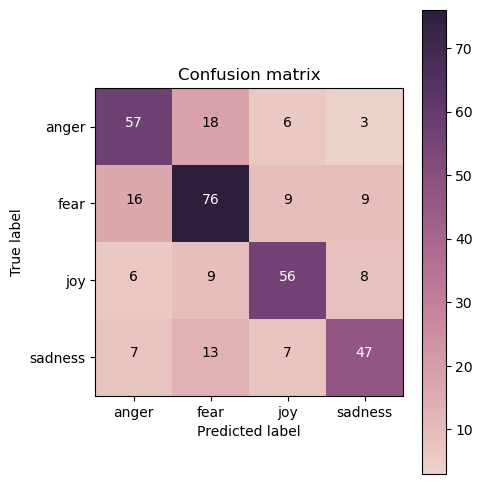

In [29]:
# plot your confusion matrix
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm, classes=my_tags, title='Confusion matrix')

---
### ** >>> Exercise 4 (Take home): **  
Build a model using a ```Naive Bayes``` model and train it. What are the testing results? 

*Reference*: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html

In [30]:
# Answer here
from sklearn.naive_bayes import MultinomialNB


In [31]:
print(X_train.shape,X_test.shape)

mnb = MultinomialNB()
mnb.fit(X_train, y_train)

y_train_pred = mnb.predict(X_train)
y_test_pred = mnb.predict(X_test)
y_test_pred[:10]

(3613, 500) (347, 500)


array(['fear', 'sadness', 'fear', 'fear', 'joy', 'anger', 'sadness',
       'fear', 'anger', 'sadness'], dtype='<U7')

In [32]:
acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)

print('training accuracy: {}'.format(round(acc_train, 3)))
print('testing accuracy: {}'.format(round(acc_test, 3)))

training accuracy: 0.792
testing accuracy: 0.697


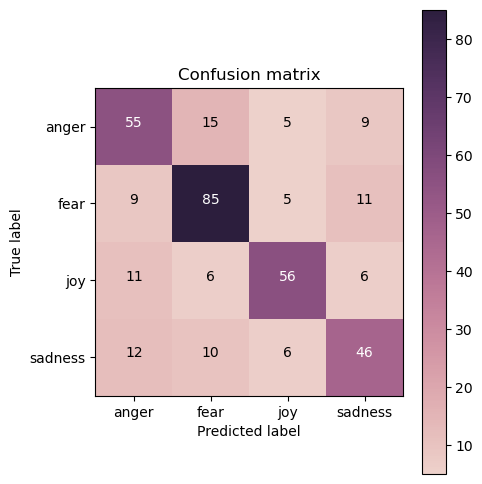

In [33]:
cm = confusion_matrix(y_true=y_test, y_pred=y_test_pred) 
plot_confusion_matrix(cm, classes=my_tags, title='Confusion matrix')

---
### ** >>> Exercise 5 (Take home): **  

How do the results from the Naive Bayes model and the Decision Tree model compare? How do you interpret these differences? Use the theoretical background covered in class to try and explain these differences.

### Answer here:
As we can see from above, the accuracy for testing datas using NB(0.697) is higher than above DecisionTreeClassifier(0.68):

`training accuracy: 0.792, testing accuracy: 0.697`

however, we can see the accuracy for training datas is much lower.

This can be due to the nature of decision tree:

1. Discriminative model
2. Easy to construct

However, it can easily overfit, meaning that it can have high training accuracy but cannot reflect it on testing data.

As for Naive Bayes, it shows less overfitting because:

1. It assumes independence between features, instead of estimating complex relationships between features, it only needs to estimate the probabilities of individual features given the class label.
2. It works well with categorical data and is effective for both binary and multi-class classification.
3. It is computationally efficient and suitable for real-time prediction because of reduced model complexity.

However,
1. Because it assumes independence between features, which may not hold in scenarios with correlated features.
2. It is sensitive to irrelevant features, potentially impacting accuracy when such features are present.

---
### ** >>> Exercise 6 (Take home): **  

Plot the Training and Validation Accuracy and Loss (different plots), just like the images below.(Note: the pictures below are an example from a different model). How to interpret the graphs you got? How are they related to the concept of overfitting/underfitting covered in class?


In [37]:
#Let's take a look at the training log
training_log = pd.DataFrame()
training_log = pd.read_csv("../logs/training_log.csv")
training_log

,epoch,accuracy,loss,val_accuracy,val_loss
0,0,0.372820,1.321136,0.466859,1.253017
1,1,0.646277,0.985999,0.654179,0.920849
2,2,0.797952,0.589421,0.703170,0.784713
3,3,0.848602,0.415802,0.697406,0.789711
4,4,0.876834,0.333639,0.717579,0.829265
5,5,0.905342,0.272594,0.691643,0.887424
6,6,0.922502,0.223782,0.703170,0.940733
7,7,0.941046,0.187216,0.694524,0.960366
8,8,0.951287,0.157368,0.697406,1.048402
9,9,0.958760,0.141292,0.671470,1.143704


C:\Users\nick0\AppData\Local\Temp\ipykernel_6824\940099295.py:10: MatplotlibDeprecationWarning:

Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.



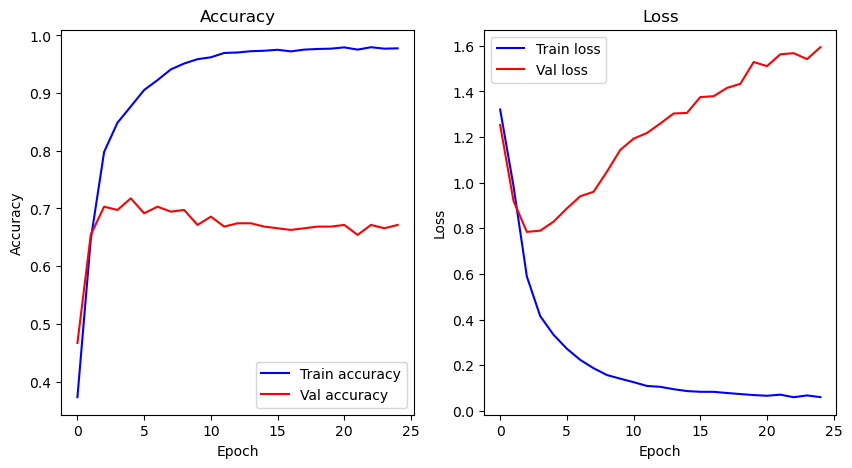

In [38]:
# Answer here
train_acc = training_log.accuracy
val_acc = training_log.val_accuracy

train_loss = training_log.loss
val_loss = training_log.val_loss

fig = plt.subplots(figsize=(10,5))

plt.subplot(1, 2, 1)
plt.plot(training_log.epoch, train_acc, color='blue', label='Train accuracy')
plt.plot(training_log.epoch, val_acc, color='red', label='Val accuracy')
# Adding labels and title
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy')
# Adding a legend
plt.legend()
# Display the plot


plt.subplot(1, 2, 2)
plt.plot(training_log.epoch, train_loss, color='blue', label='Train loss')
plt.plot(training_log.epoch, val_loss, color='red', label='Val loss')
# Adding labels and title
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss')
# Adding a legend
plt.legend()
# Display the plot
plt.show()

### Ans:
We can see as we keep training, the train loss converges, but valid loss is not decreasing but increasing after epoch 3 or 4, this could be due to that the model overfits to the training data and fails to generalize to unseen datas.

---
### ** >>> Exercise 7 (Take home): **  

Now, we have the word vectors, but our input data is a sequence of words (or say sentence). 
How can we utilize these "word" vectors to represent the sentence data and train our model?


1. Build tokenizer word index based on train and test datasets:

In [39]:
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer  = Tokenizer()
tokenizer.fit_on_texts(train_df['text'].tolist() + test_df['text'].tolist())

print(len(tokenizer.word_index))


11559


2. Use tokenizer to tokenize each sentence, each word in sentence will be mapped to a word index in tokenizer:

In [40]:
encoded_train = tokenizer.texts_to_sequences(train_df['text'])
encoded_test = tokenizer.texts_to_sequences(test_df['text'])

print(f"Original sentence: {train_df['text'].iloc[2]}, \nEncoded: {encoded_train[2]}")

Original sentence: I am in #shock and #awe and the places my #toddler manages to get his dinner., 
Encoded: [3, 95, 9, 2759, 5, 341, 5, 1, 1304, 10, 1999, 5276, 2, 37, 61, 1564]


3. Pad the encoded data with 0:

In [41]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder

padded_encoded_train = pad_sequences(encoded_train, padding='post')
padded_encoded_test = pad_sequences(encoded_test, padding='post')

print(np.array(padded_encoded_train).shape)
print(np.array(padded_encoded_test).shape)

label_encoder = LabelEncoder()
train_df['encoded_labels'] = label_encoder.fit_transform(train_df['emotion'])
train_df.head()


(3613, 34)
(347, 30)


,id,text,emotion,intensity,encoded_labels
2126,30122,"Something about these cool, breezy fall days.....",joy,0.729,2
3189,40362,@PurpleReplisol meden is frowning at you with ...,sadness,0.521,3
1528,20671,I am in #shock and #awe and the places my #tod...,fear,0.438,1
2714,30710,Halfway to work and I realize I forgot to put ...,joy,0.250,2
1448,20591,I always thought I was too empathetic but it's...,fear,0.479,1


4. Build the model using keras and train the model:

In [42]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split

X = padded_encoded_train
y = train_df['encoded_labels']

# Split train data into train and val 8:2
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


embedding_dim = 300  
vocab_size = len(tokenizer.word_index) + 1
max_sequence_length = X.shape[1]

model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_sequence_length))
model.add(LSTM(units=50, return_sequences=True))
model.add(LSTM(units=50))
model.add(Dense(units=64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=len(label_encoder.classes_), activation='softmax'))


optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()

# Train the model
epochs = 10  
batch_size = 32  
model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_val, y_val))



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 34, 300)           3468000   
                                                                 
 lstm (LSTM)                 (None, 34, 50)            70200     
                                                                 
 lstm_1 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 64)                3264      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 4)                 260       
                                                                 
Total params: 3561924 (13.59 MB)
Trainable params: 3561

5. Test our model:

In [43]:
test_df['encoded_labels'] = label_encoder.fit_transform(test_df['emotion'])
accuracy = model.evaluate(padded_encoded_test,test_df['encoded_labels'])[1]

print(accuracy)

11/11 [==============================] - 0s 3ms/step - loss: 0.8585 - accuracy: 0.7435
0.7435158491134644


---
### ** >>> Exercise 8 (Take home): **  

Generate a t-SNE visualization to show the 15 words most related to the words "angry", "happy", "sad", "fear" (60 words total).

In [45]:
from gensim.models import KeyedVectors

## Note: this model is very huge, this will take some time ...
model_path = "../GoogleNews/GoogleNews-vectors-negative300.bin"
w2v_google_model = KeyedVectors.load_word2vec_format(model_path, binary=True)
print('load ok')

w2v_google_model.most_similar('happy', topn=10)

load ok


[('glad', 0.7408890724182129),
 ('pleased', 0.6632170677185059),
 ('ecstatic', 0.6626912355422974),
 ('overjoyed', 0.6599286794662476),
 ('thrilled', 0.6514049172401428),
 ('satisfied', 0.6437949538230896),
 ('proud', 0.636042058467865),
 ('delighted', 0.6272379159927368),
 ('disappointed', 0.6269949674606323),
 ('excited', 0.6247665882110596)]

In [46]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Answer here
topn = 15
angry_words = ['angry'] + [word_ for word_, sim_ in w2v_google_model.most_similar('angry', topn=topn)]
happy_words = ['happy'] + [word_ for word_, sim_ in w2v_google_model.most_similar('happy', topn=topn)]        
sad_words = ['sad'] + [word_ for word_, sim_ in w2v_google_model.most_similar('sad', topn=topn)]        
fear_words = ['fear'] + [word_ for word_, sim_ in w2v_google_model.most_similar('fear', topn=topn)]        

print('angry_words: ', angry_words)
print('happy_words: ', happy_words)
print('sad_words: ', sad_words)
print('fear_words: ', fear_words)


target_words = angry_words + happy_words + sad_words + fear_words
print('\ntarget words: ')
print(target_words)

print('\ncolor list:')
cn = topn + 1
color = ['b'] * cn + ['g'] * cn + ['r'] * cn + ['y'] * cn
print(color)

angry_words:  ['angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed', 'agitated', 'frustrated', 'furious', 'unhappy', 'outraged', 'livid', 'irritated', 'exasperated', 'angrier', 'Angry']
happy_words:  ['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'satisfied', 'proud', 'delighted', 'disappointed', 'excited', 'happier', 'Said_Hirschbeck', 'elated', 'thankful', 'unhappy']
sad_words:  ['sad', 'saddening', 'Sad', 'saddened', 'heartbreaking', 'disheartening', 'Meny_Friedman', 'parishioner_Pat_Patello', 'saddens_me', 'distressing', 'reminders_bobbing', 'Turkoman_Shiites', 'saddest', 'unfortunate', 'sorry', 'bittersweet']
fear_words:  ['fear', 'fearful', 'fears', 'Fear', 'fearing', 'worry', 'dread', 'feared', 'anxiety', 'apprehension', 'afraid', 'worries', 'concern', 'distrust', 'worried', 'Fearful']

target words: 
['angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed', 'agitated', 'frustrated', 'furious', 'unhappy', 'outraged', 'livid', 'irritated', 'e

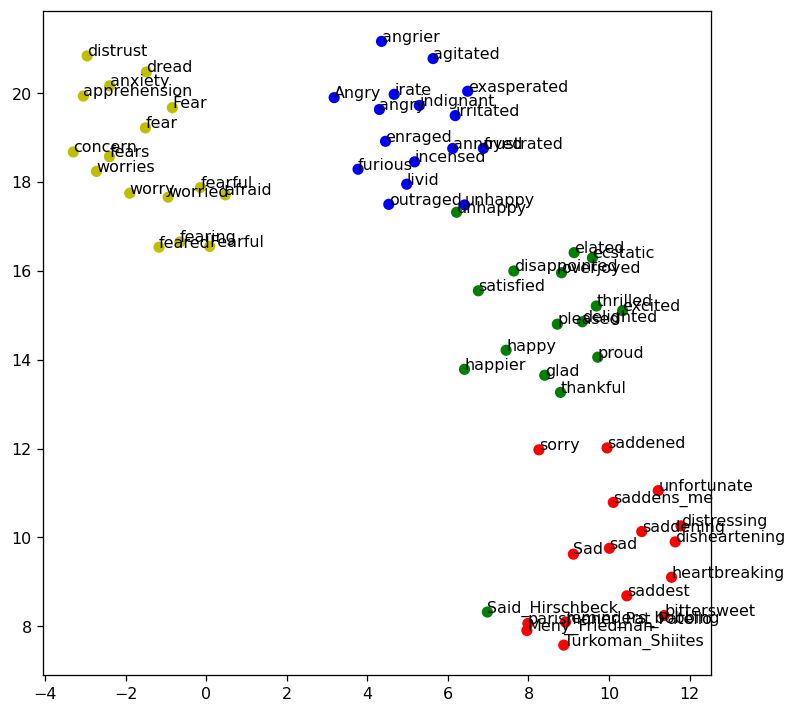

In [47]:
model = w2v_google_model

## prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.index_to_key)
word_train = target_words + all_word[:size]
X_train = model[word_train]

## t-SNE model
tsne = TSNE(n_components=2, metric='cosine', random_state=28)

## training
X_tsne = tsne.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()

=============================================================================================================
# 3. Kaggle Report

### 1. First, read csv and json files and preprocessing:

In [2]:
import pandas as pd
import json
from pathlib import Path
from datetime import datetime
from tqdm.auto import tqdm
import matplotlib.pyplot as plt

In [3]:
iden_df = pd.read_csv("../data/kaggle/data_identification.csv",
                         header=0)
emotion_df = pd.read_csv("../data/kaggle/emotion.csv",
                         header=0)
print(len(iden_df), len(emotion_df))

1867535 1455563


In [4]:
# Load the tweets json raw data file
with open("../data/kaggle/tweets_DM.json", "r") as file:
    tweets_data = [json.loads(line) for line in file]

len(tweets_data)

1867535

In [5]:
# convert json files into pandas dataframe, with tweet_id, hashtags, and text columns
tweets_info = []
for tweet in tweets_data:
    tweet_id = tweet["_source"]["tweet"]["tweet_id"]
    hashtags = tweet["_source"]["tweet"]["hashtags"]
    text = tweet["_source"]["tweet"]["text"]
    tweets_info.append({"tweet_id": tweet_id, "hashtags": hashtags, "text": text})

# Create a dataframe from the tweets information
tweets_df = pd.DataFrame(tweets_info)
tweets_df.head()


,tweet_id,hashtags,text
0,0x376b20,[Snapchat],"People who post ""add me on #Snapchat"" must be ..."
1,0x2d5350,"[freepress, TrumpLegacy, CNN]","@brianklaas As we see, Trump is dangerous to #..."
2,0x28b412,[bibleverse],"Confident of your obedience, I write to you, k..."
3,0x1cd5b0,[],Now ISSA is stalking Tasha 😂😂😂 <LH>
4,0x2de201,[],"""Trust is not the same as faith. A friend is s..."


In [6]:
# Split into train and test dataframes based on identification file
merged_df = pd.merge(iden_df, tweets_df, on="tweet_id")

train_df = merged_df[merged_df["identification"] == "train"]
test_df = merged_df[merged_df["identification"] == "test"]

# concat train_df with its ground truth emotion
train_df = pd.merge(train_df, emotion_df, on="tweet_id")

print(train_df.head())
print(len(train_df))

print(test_df.head())
print(len(test_df))

   tweet_id identification                                           hashtags  \
0  0x29e452          train                                                 []   
1  0x2b3819          train                                  [spateradio, app]   
2  0x2a2acc          train                                                 []   
3  0x2a8830          train  [PUBG, GamersUnite, twitch, BeHealthy, StayPos...   
4  0x20b21d          train                             [strength, bones, God]   

                                                text       emotion  
0  Huge Respect🖒 @JohnnyVegasReal talking about l...           joy  
1  Yoooo we hit all our monthly goals with the ne...           joy  
2  @KIDSNTS @PICU_BCH @uhbcomms @BWCHBoss Well do...         trust  
3  Come join @ambushman27 on #PUBG while he striv...           joy  
4  @fanshixieen2014 Blessings!My #strength little...  anticipation  
1455563
    tweet_id identification          hashtags  \
0   0x28cc61           test               

In [7]:
# utilize dmh functions from hw1
import sys
sys.path.append('../helpers')
import data_mining_helpers as dmh

##### Check if any missing datas:

In [8]:
train_df.isnull().apply(lambda x: dmh.check_missing_values(x))

,tweet_id,identification,hashtags,text,emotion
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0,0,0


In [9]:
test_df.isnull().apply(lambda x: dmh.check_missing_values(x))

,tweet_id,identification,hashtags,text
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0,0


### 2. Tokenize text using Roberta-tokenizer:

In [25]:
import torch
from transformers import RobertaTokenizer, RobertaTokenizerFast, RobertaForSequenceClassification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from torch.utils.data import DataLoader, TensorDataset
import pickle

In [11]:
target_list = ['anger', 'anticipation', 'disgust', 'fear', 'sadness', 'surprise', 'trust', 'joy']

##### We use pretrained Roberta-large for best performance and tokenize the tweets first:
##### This step can take quite a while and take up some memory, we can save the encoded datas into pkl files:

In [12]:
tokenizer = RobertaTokenizerFast.from_pretrained('roberta-large')
# we can use roberta-base and reduce max length to reduce the memory usage:
encoded_data = tokenizer(list(train_df['text']), truncation=True, padding=True, return_tensors='pt', max_length=256)

##### Let's see what the tokenized datas look llike:

In [13]:
input_ids = encoded_data['input_ids'][0]

# Decode the token IDs to obtain the original sentence
decoded_sentence = tokenizer.decode(input_ids, skip_special_tokens=True)

# Print the results
print("Original Sentence:", train_df['text'].iloc[0])
print("Tokenized Sentence:", decoded_sentence)

decoded_tokens = tokenizer.convert_ids_to_tokens(input_ids)
print(decoded_tokens)
print(len(decoded_tokens))
# Print each token along with its token ID
for token, token_id in zip(decoded_tokens, input_ids):
    print(f"Token: {token}\tToken ID: {token_id}")

Original Sentence: Huge Respect🖒 @JohnnyVegasReal talking about losing his dad to cancer."if you dont remember the good times it was all for nothing"#beautiful
Tokenized Sentence: Huge Respect🖒 @JohnnyVegasReal talking about losing his dad to cancer."if you dont remember the good times it was all for nothing"#beautiful
['<s>', 'H', 'uge', 'ĠRespect', 'ðŁ', 'ĸ', 'Ĵ', 'Ġ@', 'Johnny', 'V', 'eg', 'as', 'Real', 'Ġtalking', 'Ġabout', 'Ġlosing', 'Ġhis', 'Ġdad', 'Ġto', 'Ġcancer', '."', 'if', 'Ġyou', 'Ġdont', 'Ġremember', 'Ġthe', 'Ġgood', 'Ġtimes', 'Ġit', 'Ġwas', 'Ġall', 'Ġfor', 'Ġnothing', '"', '#', 'beaut', 'iful', '</s>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>'

##### Roberta uses BPE tokenizer, each unique token is mapped to Roberta predefined token ID, we have total of 1455563 sentences, each has its sentence tokenized and token ids, forming a 1455563x256 sized tensor

In [14]:
print(encoded_data['input_ids'].size())

torch.Size([1455563, 256])


##### Attention mask indicates where the token is inside the 256 tokens.

In [15]:
print(encoded_data['input_ids'][:10])
print(encoded_data['attention_mask'][:10])
unique_elements = torch.unique(encoded_data['input_ids'])
num_unique_elements = unique_elements.numel()
num_unique_elements

tensor([[    0,   725, 11797,  ...,     1,     1,     1],
        [    0,   975, 40386,  ...,     1,     1,     1],
        [    0,  1039,   530,  ...,     1,     1,     1],
        ...,
        [    0,  1039, 33049,  ...,     1,     1,     1],
        [    0,   100,    64,  ...,     1,     1,     1],
        [    0, 10431, 11621,  ...,     1,     1,     1]])
tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]])


48804

##### Roberta can encode and decode emojis properly so it should theoretically be effective in sentiment classification task:

In [16]:
tokenizer.decode(tokenizer.encode("😂"))

'<s>😂</s>'

In [17]:
label_map = {label: i for i, label in enumerate(target_list)}
label_map

{'anger': 0,
 'anticipation': 1,
 'disgust': 2,
 'fear': 3,
 'sadness': 4,
 'surprise': 5,
 'trust': 6,
 'joy': 7}

In [18]:
# Map emotion labels to each tweet's tensor
label_map = {label: i for i, label in enumerate(target_list)}
encoded_data['labels'] = torch.tensor([label_map[label] for label in train_df['emotion']])
print(encoded_data['labels'][:10])
print(encoded_data['labels'].size())

# # one-hot encoding
# one_hot_labels = torch.zeros((len(encoded_data['input_ids']), len(target_list)))

# # Iterate through the DataFrame and set the corresponding elements to 1
# for i, label in enumerate(encoded_data['labels']):
#     one_hot_labels[i, label] = 1
# encoded_data['labels'] = one_hot_labels


tensor([7, 7, 6, 7, 1, 1, 1, 7, 4, 6])
torch.Size([1455563])


In [19]:
print(train_df['text'].iloc[1])
print(train_df['emotion'].iloc[1])

Yoooo we hit all our monthly goals with the new app in two weeks. #spateradio #app <LH>
joy


### 3. We finetune Roberta for our task:
##### The reason we choose to finetune Roberta for sentiment classification is because Roberta is pretrained on Twitter datas and do consider emojis, and it has been shown to be effective in task like sentiment classification, we use RobertaForSequenceClassification and finetune it with our own tweets data and labels since we have different labels(8 sentiments) than default(positive, neutral and negative):

##### We use single_label_classification since each tweet only has one target emotion in our case, and it uses cross-entropy as loss, multi_label_classification can be used if we want to predict multiple sentiments for sentences:

In [20]:
model = RobertaForSequenceClassification.from_pretrained('roberta-large', num_labels=len(label_map), problem_type = 'single_label_classification')

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-large and are newly initialized: ['classifier.out_proj.bias', 'classifier.dense.weight', 'classifier.dense.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


##### We can see our model structure, its output is a 8 number logits tensor:

In [21]:
print(model)

RobertaForSequenceClassification(
  (roberta): RobertaModel(
    (embeddings): RobertaEmbeddings(
      (word_embeddings): Embedding(50265, 1024, padding_idx=1)
      (position_embeddings): Embedding(514, 1024, padding_idx=1)
      (token_type_embeddings): Embedding(1, 1024)
      (LayerNorm): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): RobertaEncoder(
      (layer): ModuleList(
        (0-23): 24 x RobertaLayer(
          (attention): RobertaAttention(
            (self): RobertaSelfAttention(
              (query): Linear(in_features=1024, out_features=1024, bias=True)
              (key): Linear(in_features=1024, out_features=1024, bias=True)
              (value): Linear(in_features=1024, out_features=1024, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): RobertaSelfOutput(
              (dense): Linear(in_features=1024, out_features=1024, bias=True)
 

In [22]:
import os
os.environ['CUDA_LAUNCH_BLOCKING'] = '1'
"cuda" if torch.cuda.is_available() else "cpu"

'cuda'

# Training:
##### Here we define our pytorch trainer, since we are using Roberta-large and our dataset is large, it will take quite a while to train, about 2 hours for 1 epoch using RTX 4090, so you can just load our trained model with best result in "./runs/test_pred_large_full_epoch5_lr3e-6_bs16/training_result/model.pth" in the block below testing:

In [50]:
class Trainer:
    def __init__(self, log_dir, model, encoded_data):
        '''Initialize the varibles for training
        Args:
            log_dir: (pathlib.Path) the direction used for logging
        '''
        self.log_dir = log_dir
        print(self.log_dir)
        # Split into train and valid, 8:2
        self.train_inputs, self.validation_inputs, self.train_attentions, self.validation_attentions, self.train_labels, self.validation_labels = train_test_split(encoded_data['input_ids'],
                                                                                            encoded_data['attention_mask'],
                                                                                            encoded_data['labels'],
                                                                                            random_state=42,
                                                                                            test_size=0.2)
        self.batch_size = 16
        self.train_dataset = TensorDataset(self.train_inputs, self.train_attentions, self.train_labels)
        self.train_loader = DataLoader(self.train_dataset, batch_size=self.batch_size, shuffle=True, num_workers=0)
        self.validation_dataset = TensorDataset(self.validation_inputs, self.validation_attentions, self.validation_labels)
        self.valid_loader = DataLoader(self.validation_dataset, batch_size=self.batch_size, shuffle=False, num_workers=0)

        print(len(self.train_dataset))


        # model, loss function, optimizer
        self.device = 'cuda'
        self.model = model.to(self.device)
        self.criterion = torch.nn.CrossEntropyLoss()
        self.lr = 5e-6
        self.optimizer = torch.optim.Adam(model.parameters(), lr=self.lr)
        self.lr_decay = 0.5
        self.scheduler = torch.optim.lr_scheduler.StepLR(self.optimizer, 1, gamma=self.lr_decay, last_epoch=-1, verbose=False)
        # self.scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(self.optimizer, 'min', verbose=True)
        self.max_epoch = 8

    def run(self):
        training_result_dir = self.log_dir / 'training_result'
        training_result_dir.mkdir(parents=True)
        metrics = {'train_loss': [], 'valid_loss': []}
        lrs = []
        for self.epoch in range(self.max_epoch): # epochs
            train_loss = self.train() # train 1 epoch
            valid_loss = self.valid() # valid 1 epoch
            print('lr:',get_lr(self.optimizer))
            lrs.append(get_lr(self.optimizer))
            print(f'Epoch {self.epoch:03d}:')
            print('train loss:', train_loss)
            print('valid loss:', valid_loss)
            metrics['train_loss'].append(train_loss)
            metrics['valid_loss'].append(valid_loss)
            # Save the parameters(weights) of the model to disk
            if torch.tensor(metrics['valid_loss']).argmin() == self.epoch:
                torch.save(self.model.state_dict(), str(training_result_dir / 'model.pth'))
        
        # Plot the loss curve against epoch
        fig, ax = plt.subplots(1, 1, figsize=(10, 10), dpi=100)
        ax.set_title(f'Loss(batch_size:{self.batch_size}, lr:{self.lr}, lr_decay:{self.lr_decay if self.lr_decay else "False"})')
        ax.plot(range(self.epoch + 1), metrics['train_loss'], label='Train')
        ax.plot(range(self.epoch + 1), metrics['valid_loss'], label='Valid')
        ax.legend()
        plt.show()
        fig.savefig(str(training_result_dir / 'metrics.jpg'))
        plt.close()


    def train(self):
        '''Train one epoch
        1. Switch model to training mode
        2. Iterate mini-batches and do:
            a. clear gradient
            b. forward to get loss
            c. loss backward
            d. update parameters
        3. Return the average loss in this epoch
        '''
        self.model.train()
        loss_steps = []

        for batch_inputs, batch_attentions, batch_labels in tqdm(self.train_loader):
            batch_inputs, batch_attentions, batch_labels = batch_inputs.to(self.device), batch_attentions.to(self.device), batch_labels.to(self.device)
            # Forward pass
            outputs = model(input_ids=batch_inputs, attention_mask=batch_attentions ,labels=batch_labels)
            loss = outputs.loss
            # print(outputs.logits)
            # predictions = torch.nn.functional.softmax(outputs.logits, dim=1)
            # print(predictions)
            # predictions = torch.argmax(predictions, dim=1)
            # print(batch_labels, predictions)
            # print(loss)
            # Backward pass and optimization
            self.optimizer.zero_grad()
            loss.backward()
            self.optimizer.step()
            loss_steps.append(loss.detach().item())
            # total_loss += loss.item()
            # self.scheduler.step()
        
        # Calculate average training loss for the epoch
        avg_train_loss = sum(loss_steps) / len(self.train_loader)
        print(f"Epoch {self.epoch + 1}, Avg. Training Loss: {avg_train_loss:.4f}")
        
        return avg_train_loss

    @torch.no_grad()
    def valid(self):
        '''Validate one epoch
        1. Switch model to evaluation mode and turn off gradient (by @torch.no_grad() or with torch.no_grad())
        2. Iterate mini-batches and do forwarding to get loss
        3. Return average loss in this epoch
        '''
        self.model.eval()
        loss_steps = []
        all_predictions = []
        all_true_labels = []

        for batch_inputs, batch_attentions, batch_labels in self.valid_loader:
            batch_inputs, batch_attentions, batch_labels = batch_inputs.to(self.device), batch_attentions.to(self.device), batch_labels.to(self.device)
            # Forward pass
            outputs = self.model(input_ids=batch_inputs, attention_mask=batch_attentions)
            predictions = outputs.logits.cpu()
            # predictions = torch.nn.functional.softmax(outputs.logits).cpu()
            # predictions = torch.argmax(predictions, dim=1).cpu().numpy()
            true_labels = batch_labels.cpu()
            # print(predictions, true_labels)
            loss_steps.append(self.criterion(predictions, true_labels))
            true_labels = true_labels.numpy()
            all_predictions.extend(predictions)
            all_true_labels.extend(true_labels)

            

        # Calculate accuracy on the validation set
        avg_valid_loss = sum(loss_steps) / len(self.valid_loader)
        print(f"Epoch {self.epoch + 1}, Validation Accuracy: {avg_valid_loss:.4f}")
        return avg_valid_loss

def get_lr(optimizer):
    for param_group in optimizer.param_groups:
        return param_group['lr']


log_dir = Path('./runs/') / f'{datetime.now():%b%d_%H_%M_%S}'
log_dir.mkdir(parents=True, exist_ok=True)
model = RobertaForSequenceClassification.from_pretrained('roberta-large', num_labels=len(label_map), problem_type = 'single_label_classification')
Trainer(log_dir, model, encoded_data).run()

### 4. Inference:
##### Predict our testing dataset emotions and save it as csv:

# Testing:
##### Here we load our testing dataset, tokennize it and create the dataloader:

In [23]:
test_encoded_data = tokenizer(list(test_df['text']), truncation=True, padding=True, return_tensors='pt', max_length=256)

class CustomTestDataset(TensorDataset):
    def __init__(self, tweet_ids, input_ids, attention_mask):
        super(CustomTestDataset, self).__init__(input_ids,attention_mask)
        self.tweet_ids = tweet_ids

    def __getitem__(self, index):
        # Return both input_ids tensor and tweet_id
        return (self.tweet_ids[index], super(CustomTestDataset, self).__getitem__(index))
    
test_dataset = CustomTestDataset(test_df["tweet_id"].values, test_encoded_data['input_ids'], test_encoded_data['attention_mask'])

# Create the data loader
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

print(test_encoded_data['input_ids'].size())


torch.Size([411972, 218])


##### Load our trained weights into our model:

In [24]:
device = 'cuda'
model = model.to(device)
log_dir =  Path('./runs/') / 'test_pred_large_full_epoch5_lr3e-6_bs16'
model.load_state_dict(torch.load(str(log_dir / 'training_result/model.pth')))
# model.eval()
print(str(log_dir / 'training_result/model.pth'))

log_dir_test = Path('./testing_result') / f'{datetime.now():%b%d_%H_%M_%S}'
log_dir_test.mkdir(parents=True)
print(log_dir_test)

runs\test_pred_large_full_epoch5_lr3e-6_bs16\training_result\model.pth
testing_result\Dec30_20_16_39


In [1]:
# model.state_dict()

##### Testing model prediction using random sentence:

In [60]:
test = test_df['text'].iloc[4]
print(test)
test_encoded_data = tokenizer(test, truncation=True, padding=True, return_tensors='pt', max_length=256)
model.eval()
predictions = model(input_ids=test_encoded_data['input_ids'].cuda(), attention_mask=test_encoded_data['attention_mask'].cuda())
print(predictions)
predictions = torch.argmax(predictions.logits, dim=1)
print(target_list[predictions])


Felt like total dog 💩 going into open gym and had a migraine Played through and sweated it out and my sweat has never been that bad. <LH>
SequenceClassifierOutput(loss=None, logits=tensor([[-0.4467,  0.0569,  0.7836, -2.3658, -0.2151, -0.5494,  1.5402,  1.7775]],
       device='cuda:0', grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None)
joy


In [ ]:
def test():
    model.eval()
    all_predictions = []
    all_tweet_ids = []
    for batch_inputs in tqdm(test_loader):
        tweet_ids = list(batch_inputs[0])
        # print(tweet_ids)
        batch_inputs[1][0] = batch_inputs[1][0].to(device)
        batch_inputs[1][1] = batch_inputs[1][1].to(device)
        # Forward pass
        outputs = model(input_ids=batch_inputs[1][0], attention_mask=batch_inputs[1][1])
        logits = outputs.logits
        predictions = torch.nn.functional.softmax(logits, dim=1)
        # print(predictions)
        predictions = torch.argmax(predictions, dim=1)
        predicted_labels = [target_list[idx] for idx in predictions]
        # print(predicted_labels)
        all_tweet_ids.extend(tweet_ids)
        all_predictions.extend(predicted_labels)

    
    predicted_dict = dict(zip(all_tweet_ids, all_predictions))
    # print(predicted_dict)
    return predicted_dict


with torch.no_grad():
    df_pred = test()
    print(df_pred)

In [ ]:
len(df_pred)

In [ ]:
unique_val_set = set(df_pred.values())
print(unique_val_set)

{'sadness', 'disgust', 'surprise', 'anticipation', 'trust', 'joy', 'anger', 'fear'}


##### Submission CSV file is stored in ./testing_result:

In [ ]:
result_df = pd.DataFrame(list(df_pred.items()))
print(len(result_df))
result_df.head()
result_df.columns = ['id', 'emotion']
result_df.reset_index(drop=True, inplace=True)
result_df.to_csv(str(log_dir_test / 'test_pred.csv'), index=False)